In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Loading data

In [285]:
path="../data/diabetes.csv"
diabetes_df=pd.read_csv(path)

### splitting data

In [325]:
from sklearn.model_selection import train_test_split

diabetes_train,diabetes_test=train_test_split(diabetes_df,test_size=0.2,random_state=42)

In [287]:
diabetes_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56553 entries, 61789 to 15795
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       56553 non-null  float64
 1   HighBP                56553 non-null  float64
 2   HighChol              56553 non-null  float64
 3   CholCheck             56553 non-null  float64
 4   BMI                   56553 non-null  float64
 5   Smoker                56553 non-null  float64
 6   Stroke                56553 non-null  float64
 7   HeartDiseaseorAttack  56553 non-null  float64
 8   PhysActivity          56553 non-null  float64
 9   Fruits                56553 non-null  float64
 10  Veggies               56553 non-null  float64
 11  HvyAlcoholConsump     56553 non-null  float64
 12  AnyHealthcare         56553 non-null  float64
 13  NoDocbcCost           56553 non-null  float64
 14  GenHlth               56553 non-null  float64
 15  MentHlth            

In [288]:
diabetes_train.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
61789,1.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,3.0,0.0,1.0,11.0,4.0,6.0
46280,1.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,11.0,4.0,2.0
18465,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,4.0,10.0,27.0,1.0,0.0,8.0,5.0,5.0
45540,1.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,6.0,7.0
28119,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,2.0,1.0,0.0,5.0,2.0,2.0


### Visualizing Age Data

In [289]:
diabetes_train["Age"].describe()

count    56553.000000
mean         8.576769
std          2.852993
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Age, dtype: float64

In [290]:
age_count=diabetes_train["Age"].value_counts().sort_index()

age_count

Age
1.0      789
2.0     1129
3.0     1635
4.0     2231
5.0     2828
6.0     3713
7.0     5557
8.0     6907
9.0     8018
10.0    8716
11.0    6412
12.0    4295
13.0    4323
Name: count, dtype: int64

In [291]:
labels = ["18 to 24","25 to 29","30 to 34","35 to 39","40 to 44","45 to 49","50 to 54","55 to 59",
          "60 to 64","65 to 69","70 to 74","75 to 79","80 or older"]

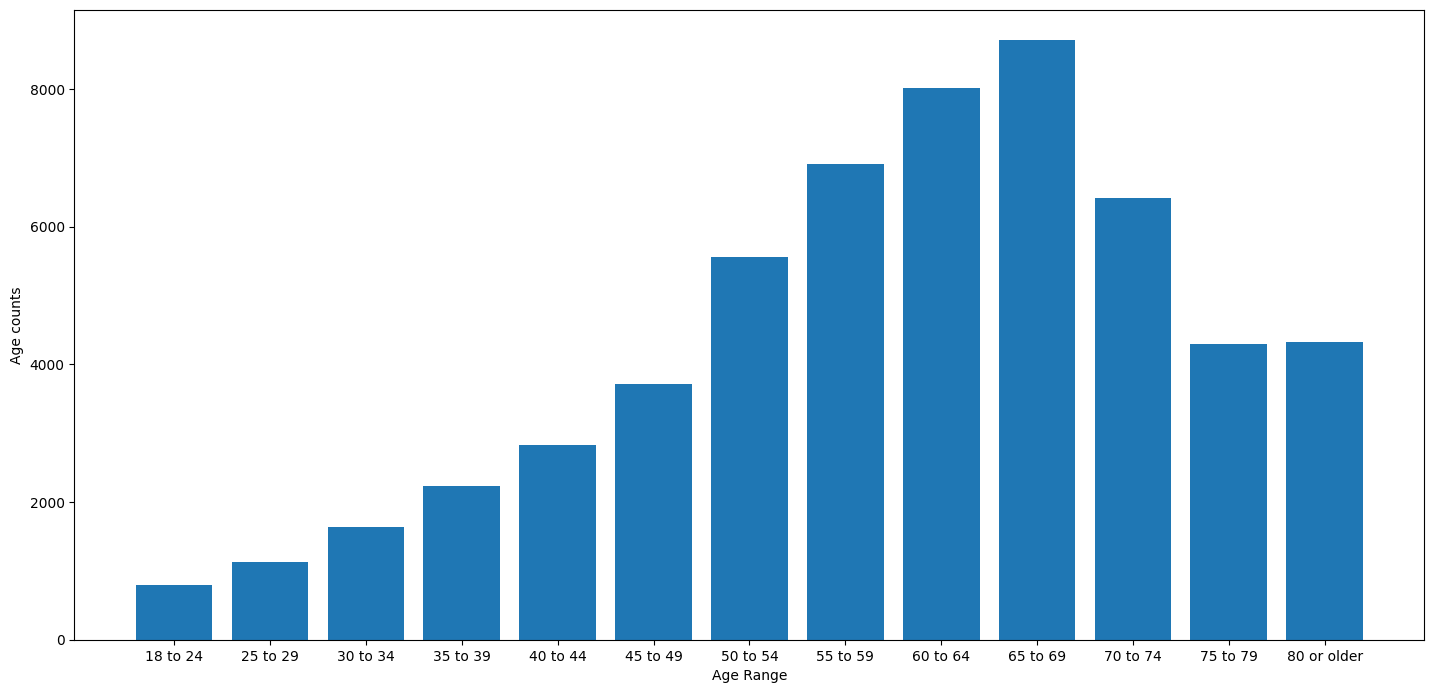

In [292]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.set_xlabel('Age Range')
age_axes.set_ylabel('Age counts')

age_axes.bar(labels,age_count.values)

plt.show()

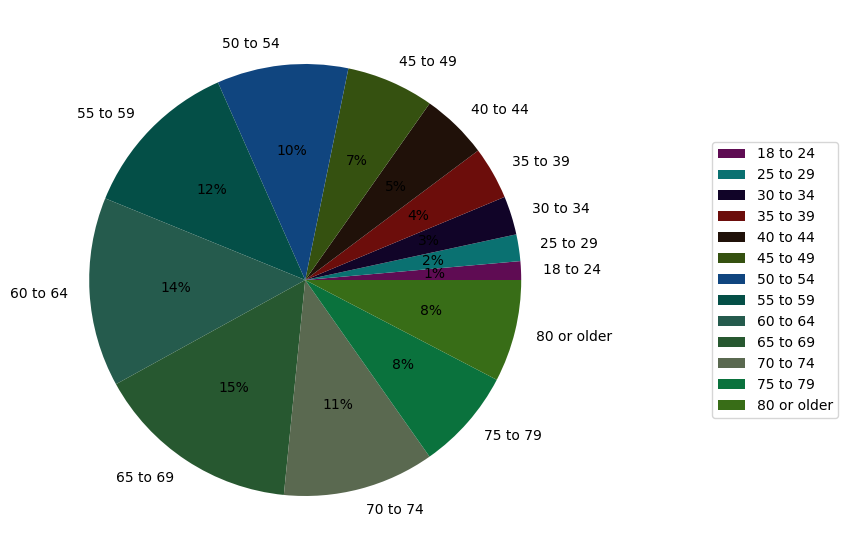

In [293]:
import random

age_figer=plt.figure(figsize=(10,6),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(age_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)

wedges, texts, autotexts=age_axes.pie(age_count.values,labels=labels,
                                      colors=colors,autopct="%1.0f%%") #,textprops=dict(color="w")
plt.legend(wedges,labels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [294]:
age_diabetes_distribution =(
    diabetes_train.groupby(by=["Age","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

age_diabetes_distribution

Diabetes_binary,0.0,1.0
Age,,
1.0,728,61
2.0,1013,116
3.0,1383,252
4.0,1744,487
5.0,1981,847
6.0,2337,1376
7.0,3052,2505
8.0,3473,3434
9.0,3457,4561


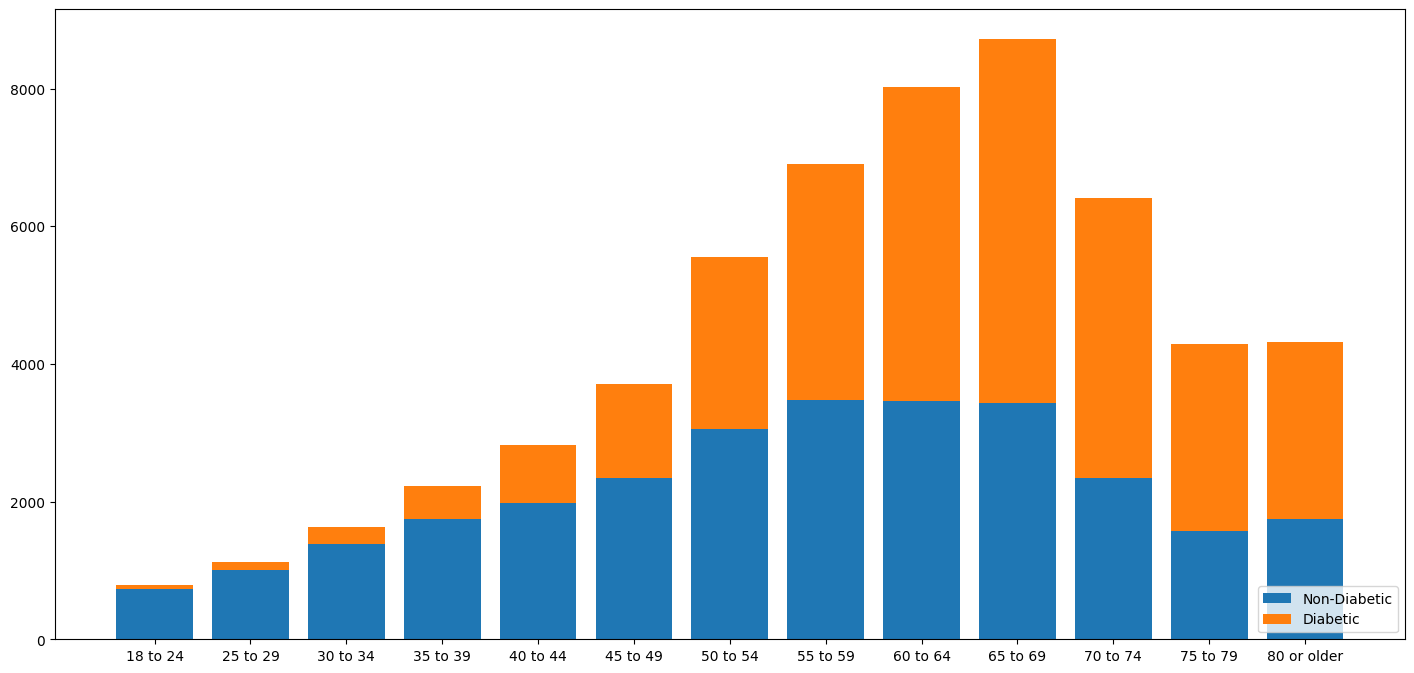

In [295]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.bar(labels,age_diabetes_distribution [0],label="Non-Diabetic")
age_axes.bar(labels,age_diabetes_distribution [1],label="Diabetic",bottom=age_diabetes_distribution [0])
plt.legend(loc="lower right")


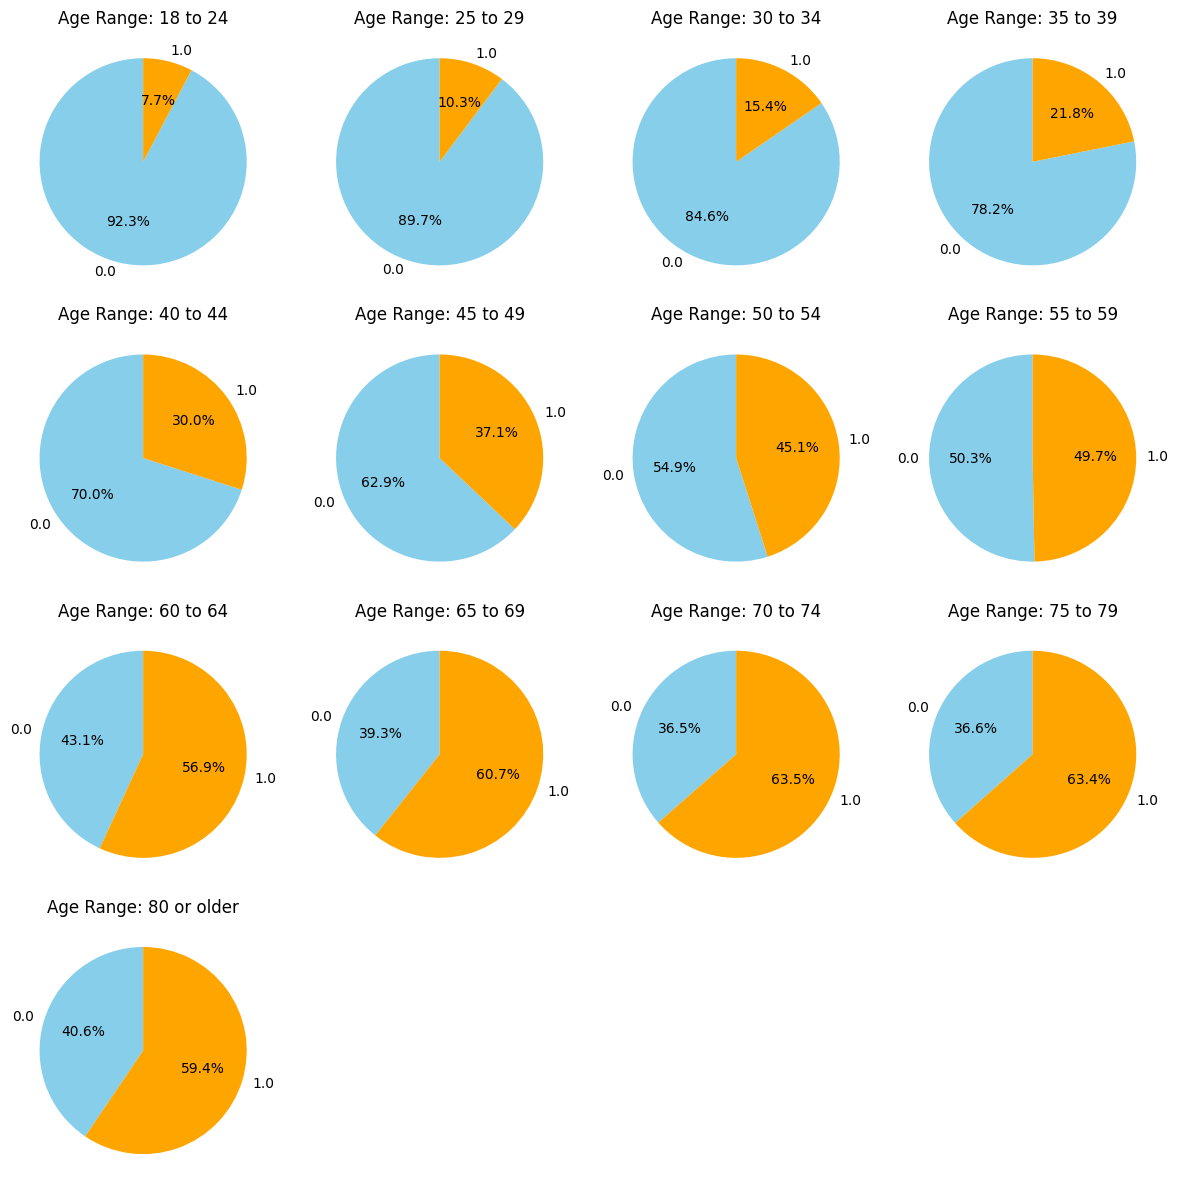

In [296]:
import math

age_diabetes_percentage = age_diabetes_distribution.div(age_diabetes_distribution.sum(axis=1), axis=0) * 100

num_age_ranges = len(age_diabetes_percentage)

rows = math.ceil(num_age_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, age_range in enumerate(labels):
    data = age_diabetes_percentage.loc[labels.index(age_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Age Range: {age_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Visualizing Education Data

In [297]:
diabetes_train["Education"].describe()

count    56553.000000
mean         4.922551
std          1.030487
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Education, dtype: float64

In [298]:
education_count=diabetes_train["Education"].value_counts().sort_values()
education_count

Education
1.0       61
2.0     1322
3.0     2773
4.0    15525
5.0    15971
6.0    20901
Name: count, dtype: int64

In [299]:
education_levels = [
    "Never Attended School",
    "Elementary",
    "High School",
    "Some College Degree",
    "Advanced Degree",
    "6" 
]

<BarContainer object of 6 artists>

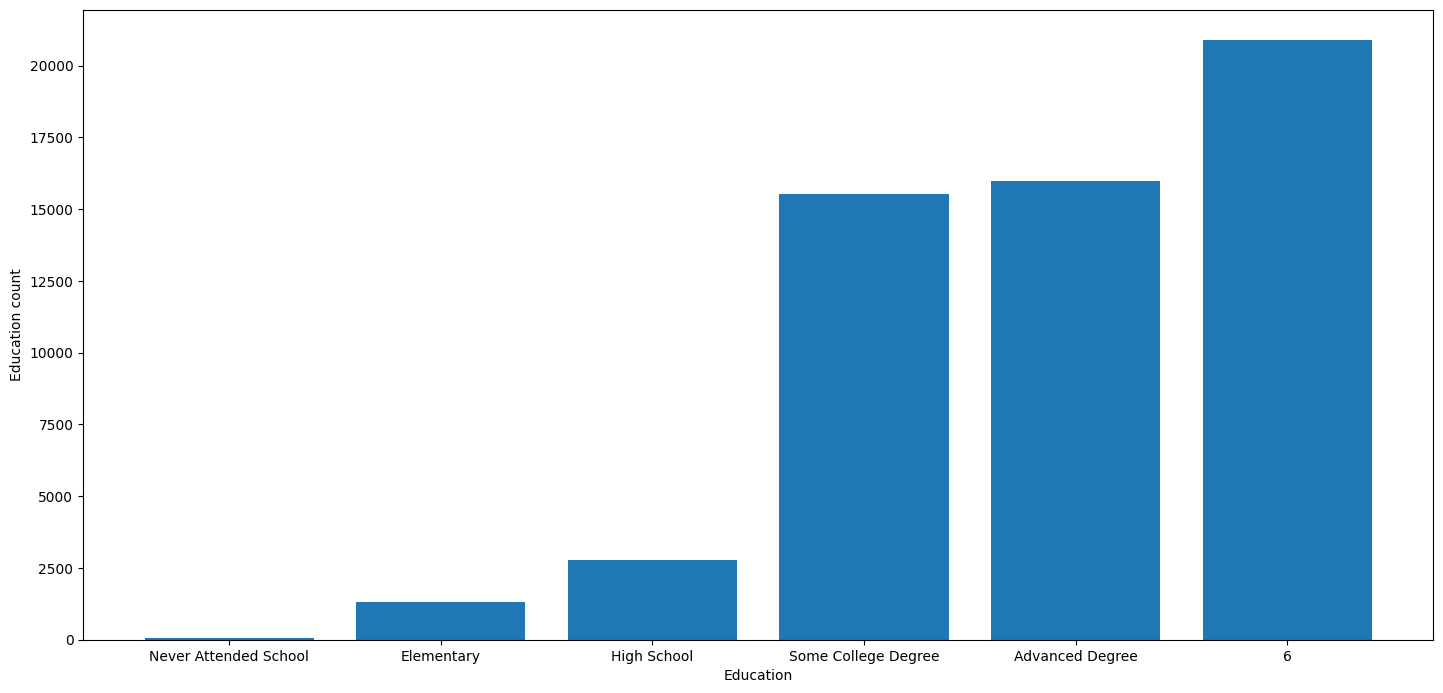

In [300]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.set_xlabel('Education')
education_axes.set_ylabel('Education count')

education_axes.bar(education_levels,education_count.values)

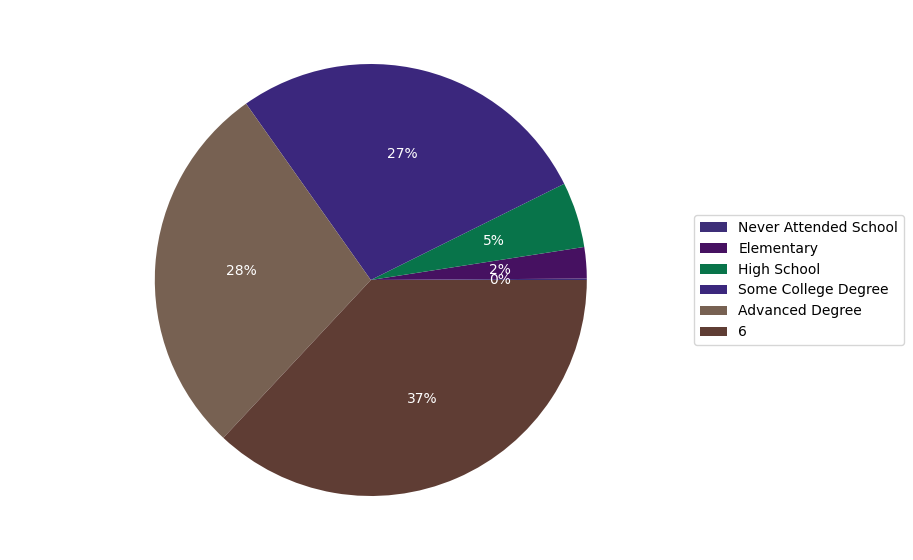

In [301]:
import random

education_figer=plt.figure(figsize=(20,6),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(education_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)


wedges, texts, autotexts=education_axes.pie(education_count.values,labels=education_levels,
                                      colors=colors,autopct="%1.0f%%",textprops=dict(color="w"))
plt.legend(wedges,education_levels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [302]:
education_diabetes_distribution =(
    diabetes_train.groupby(by=["Education","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

education_diabetes_distribution

Diabetes_binary,0.0,1.0
Education,,
1.0,26,35
2.0,370,952
3.0,920,1853
4.0,6720,8805
5.0,7731,8240
6.0,12489,8412


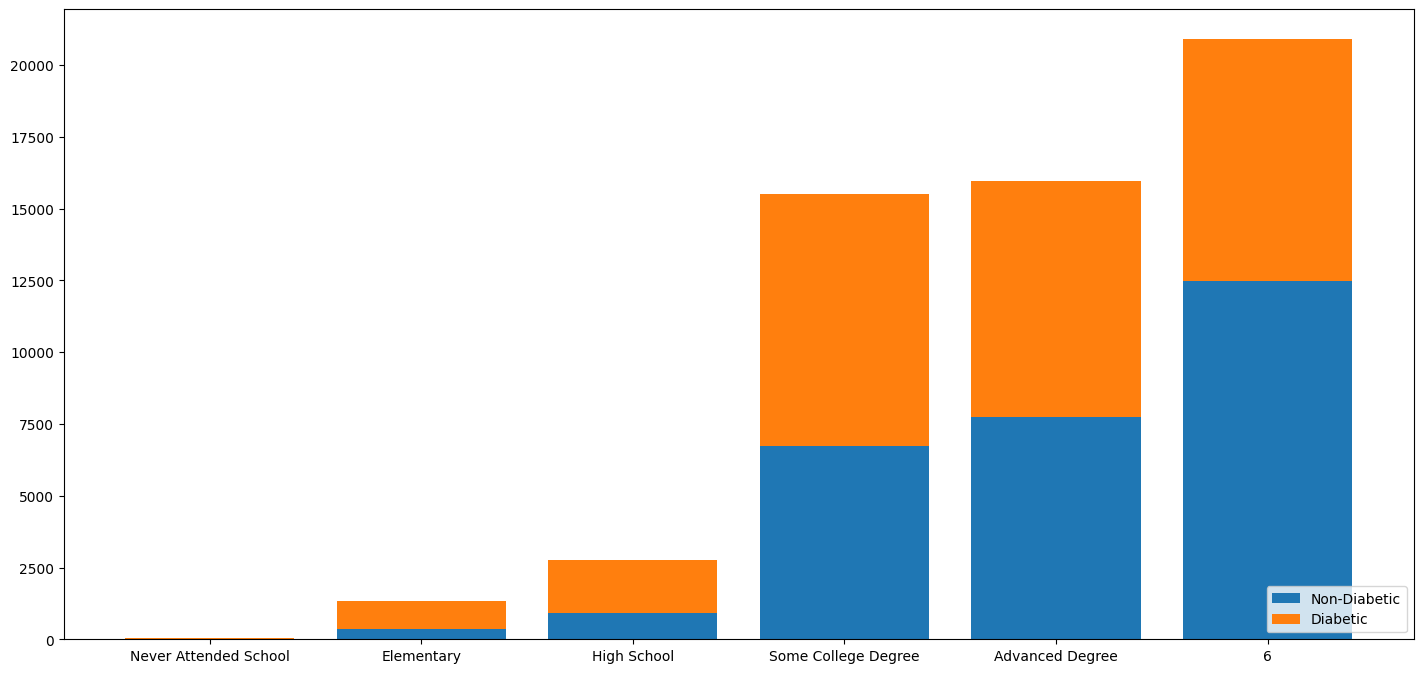

In [303]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.bar(education_levels,education_diabetes_distribution [0],label="Non-Diabetic")
education_axes.bar(education_levels,education_diabetes_distribution [1],label="Diabetic",bottom=education_diabetes_distribution [0])
plt.legend(loc="lower right")

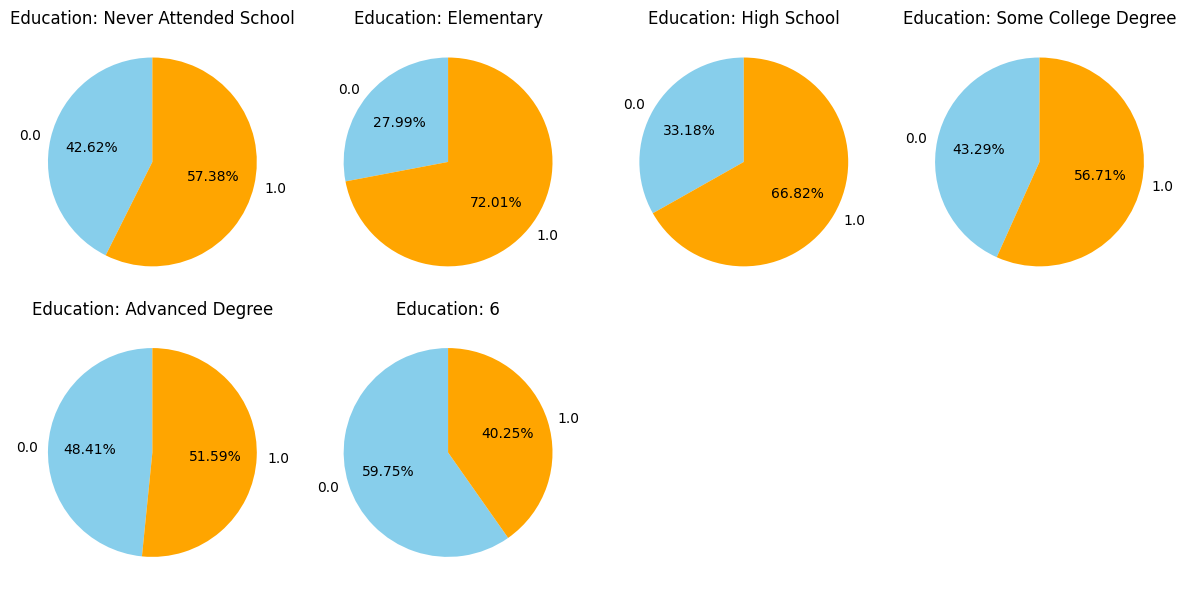

In [304]:
import math

education_diabetes_percentage = education_diabetes_distribution.div(education_diabetes_distribution.sum(axis=1), axis=0) * 100

num_education_ranges = len(education_diabetes_percentage)

rows = math.ceil(num_education_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, education_range in enumerate(education_levels):
    data = education_diabetes_percentage.loc[education_levels.index(education_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%0.2f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Education: {education_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## visualizing General Health data 

selecting the colors

In [305]:
colors = ['#66b3ff', '#ff6666']

### 1.histograms

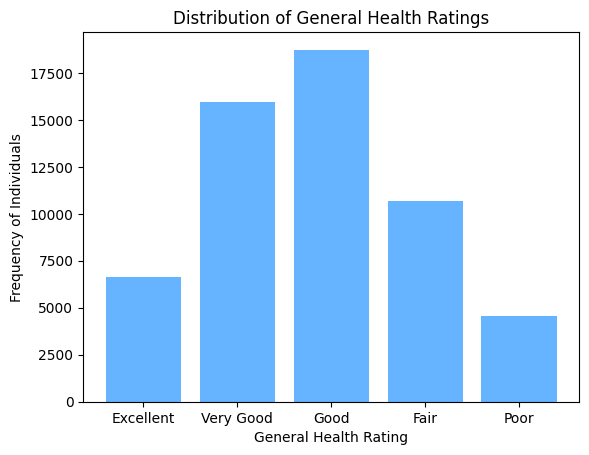

In [306]:
# Define the order of bins
ratings = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Calculate frequency and reindex
freq = diabetes_train["GenHlth"].value_counts().sort_index()

# Use bar chart instead of histogram
plt.bar(ratings, freq.values, color=colors[0])
plt.ylabel("Frequency of Individuals")
plt.xlabel("General Health Rating")
plt.title("Distribution of General Health Ratings")

plt.show()


### 2.bar chart


a bar chart that shows each rating with its occurances, splitted to *'Diabetic'* and *'Non-Diabetic'*

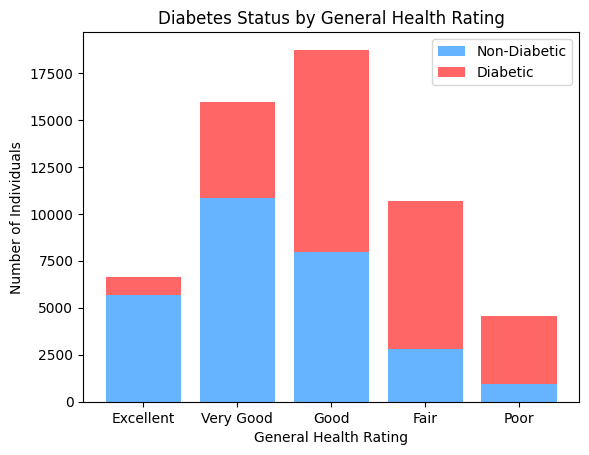

GenHlth  Diabetes_binary
1.0      0.0                 5704
         1.0                  926
2.0      0.0                10826
         1.0                 5124
3.0      0.0                 7965
         1.0                10766
4.0      0.0                 2792
         1.0                 7866
5.0      0.0                  969
         1.0                 3615
dtype: int64

In [308]:
group_sizes = diabetes_train.groupby(["GenHlth", "Diabetes_binary"]).size()

gen_hlth_diabetic= [int(group_sizes[i][1]) for i in freq.index]
gen_hlth_non_diabetic= [int(group_sizes[i][0]) for i in freq.index]

plt.bar(ratings, gen_hlth_non_diabetic, label='Non-Diabetic', color=colors[0])
plt.bar(ratings, gen_hlth_diabetic, bottom=gen_hlth_non_diabetic, label='Diabetic', color=colors[1])

#adding labels and title
plt.xlabel('General Health Rating')
plt.ylabel('Number of Individuals')
plt.title('Diabetes Status by General Health Rating')
plt.legend() #to show labels in the upper right corner
plt.show()
group_sizes

### 3.pie chart
each pie chart visualizes the proportion of diabetic and non-diabetic individuals in each health category, with the percentage distribution shown on the chart.

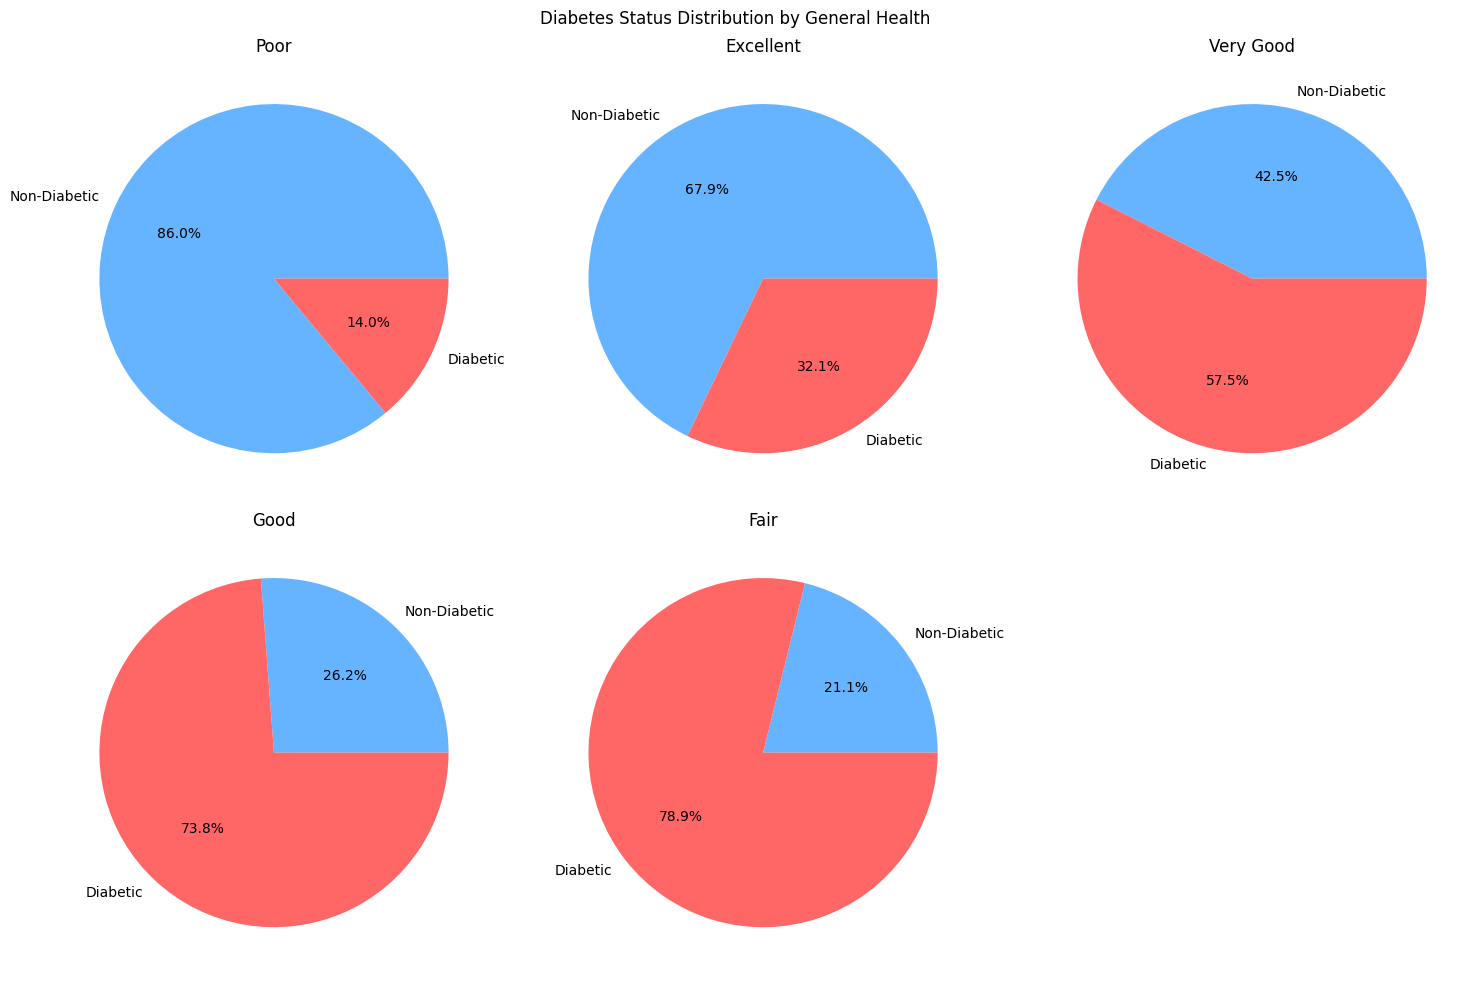

In [309]:
# Assuming you have the necessary data
num_plots = 5  # Number of pie charts to display
rows = 2  # Two rows
cols = 3  # Three columns

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array to easily index it
axes = axes.flatten()

for i, rating in enumerate(freq.index):
    ax = axes[i]  # Select the subplot
    ax.pie([int(group_sizes[rating][0]), int(group_sizes[rating][1])], 
           labels=["Non-Diabetic", "Diabetic"], autopct='%0.1f%%', colors=colors)
    ax.set_title(ratings[i-1])  # Use the updated categories

# Hide empty subplots (if any)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

fig.suptitle("Diabetes Status Distribution by General Health")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Visualizing BMI Data

In [310]:
bmi_count=diabetes_train["BMI"].value_counts().sort_index()

bmi_count

BMI
12.0     1
13.0     5
14.0     5
15.0    23
16.0    51
        ..
87.0    11
89.0     4
92.0     8
95.0     3
98.0     2
Name: count, Length: 76, dtype: int64

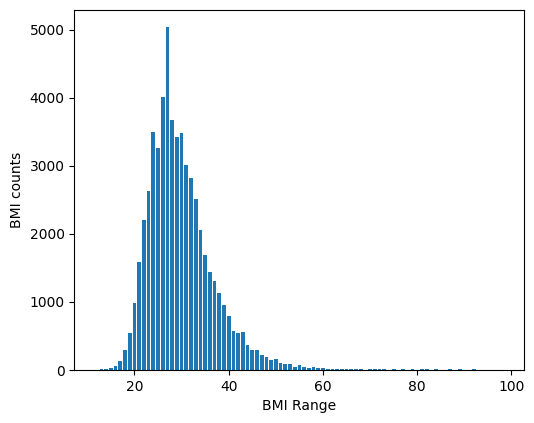

In [311]:
bmi_figer=plt.figure(figsize=(5,4),dpi=100)
bmi_axes=bmi_figer.add_axes([0.1,0.1,0.9,0.9])

bmi_axes.set_xlabel('BMI Range')
bmi_axes.set_ylabel('BMI counts')

bmi_axes.bar(bmi_count.index,bmi_count.values)

plt.show()

### Visualizing Veggies data
if the individual consumes veggies at least once per day 

In [326]:
diabetes_train["Veggies"].value_counts()

Veggies
1.0    44642
0.0    11911
Name: count, dtype: int64

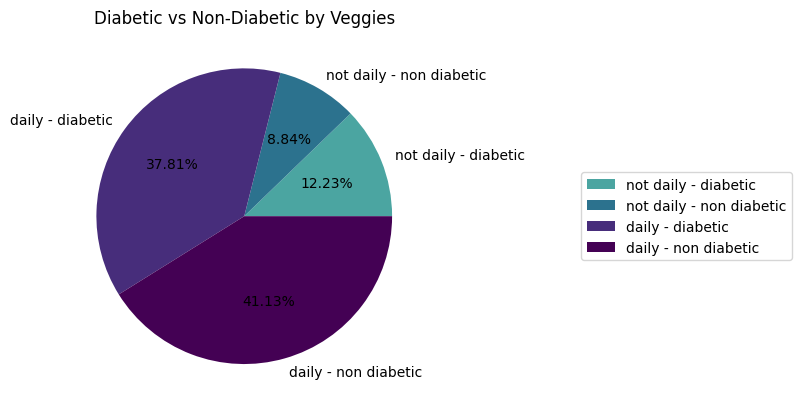

In [313]:
grouped_by_veggies = diabetes_train.groupby(["Veggies", "Diabetes_binary"]).size()
labels = ["not daily - diabetic", "not daily - non diabetic", "daily - diabetic", "daily - non diabetic"]
nums = [grouped_by_veggies[0][1], grouped_by_veggies[0][0], grouped_by_veggies[1][1], grouped_by_veggies[1][0]]
plt.pie(nums, labels=labels, autopct='%0.2f%%', colors=["#21908CCF", "#2C728EFF", "#472D7BFF", "#440154FF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Veggies")
plt.show()

### Visualizing Fruits data
if the individual consumes fruit at least once per day 

In [327]:
diabetes_train["Fruits"].value_counts()

Fruits
1.0    34716
0.0    21837
Name: count, dtype: int64

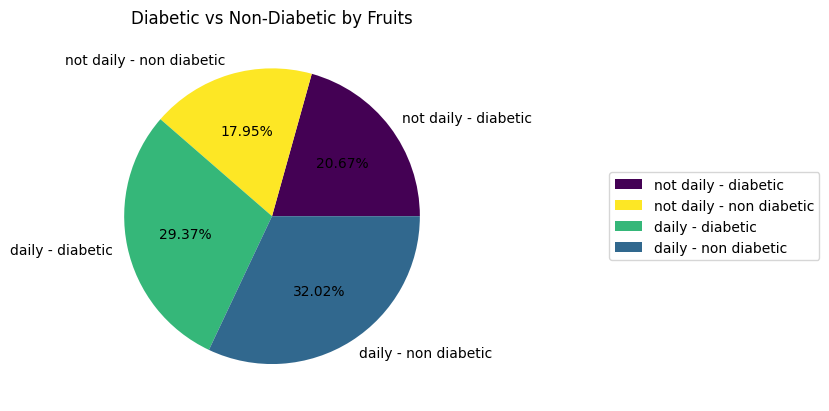

In [315]:
grouped_by_fruits = diabetes_train.groupby(["Fruits", "Diabetes_binary"]).size().sort_index()
nums = [grouped_by_fruits[0][1], grouped_by_fruits[0][0], grouped_by_fruits[1][1], grouped_by_fruits[1][0]]
plt.pie(nums, labels = labels, autopct='%0.2f%%', colors=["#440154FF", "#FDE725FF", "#35B779FF", "#31688EFF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Fruits")
plt.show()


# Feature Engineering

## Data Transformation

### BMI transformation
transformaing the BMI data to [-1, 0, 1, 2]

In [316]:
def transform_BMI(bmi) :
    if bmi <= 18 :
        return 0
    elif bmi < 25 :
        return 1/3
    elif bmi < 30 :
        return 2/3
    else : return 1
    
diabetes_train["BMI"] = diabetes_train["BMI"].apply(transform_BMI)
diabetes_test["BMI"] = diabetes_test["BMI"].apply(transform_BMI)

diabetes_train["BMI"].value_counts()

BMI
1.000000    25217
0.666667    19396
0.333333    11428
0.000000      512
Name: count, dtype: int64

## Feature Extraction

### health_score
extracting a new feature that represents the health score from scale 0 to 3 by combining 3 features BMI, HighBP, HighChol

In [317]:
diabetes_train["health_score"] = diabetes_train["HighBP"] + diabetes_train["HighChol"] + diabetes_train["BMI"] 
diabetes_test["health_score"] = diabetes_test["HighBP"] + diabetes_test["HighChol"] + diabetes_test["BMI"]

diabetes_train["health_score"].value_counts().sort_index()

health_score
0.000000      248
0.333333     5436
0.666667     5847
1.000000     4814
1.333333     3541
1.666667     6760
2.000000     8854
2.333333     2451
2.666667     6789
3.000000    11813
Name: count, dtype: int64

### MultiRisk_factors
extracting a new feature that flags individuals with multiple risk factors using 3 features HighBP, HighChol, BMI

In [318]:
diabetes_train['MultiRisk_factors'] = (diabetes_train["HighBP"].astype(bool) & diabetes_train["HighChol"].astype(bool) & (diabetes_train["BMI"] == 1.0)).astype(int)
diabetes_test['MultiRisk_factors'] = (diabetes_test["HighBP"].astype(bool) & diabetes_test["HighChol"].astype(bool) & (diabetes_test["BMI"] == 1.0)).astype(int)

diabetes_train['MultiRisk_factors'].value_counts()

MultiRisk_factors
0    44740
1    11813
Name: count, dtype: int64

### EatingHealthyFood
extracting new feature that flags users who eats either vegies or fruits at least once per a day

In [330]:
diabetes_train['EatingHealthyFood'] = diabetes_train["Veggies"] + diabetes_train["Fruits"]
diabetes_test['EatingHealthyFood'] = diabetes_test["Veggies"] + diabetes_test["Fruits"]

diabetes_train["EatingHealthyFood"].value_counts()

EatingHealthyFood
2.0    30049
1.0    19260
0.0     7244
Name: count, dtype: int64

### SocioeconomicStatus
feature that represents the social economic status of the individual

In [334]:
diabetes_train['SocioeconomicStatus'] = diabetes_train['Income'] + diabetes_train['Education']
diabetes_test['SocioeconomicStatus'] = diabetes_test['Income'] + diabetes_test['Education']

diabetes_train['SocioeconomicStatus'].value_counts()

SocioeconomicStatus
14.0    10527
13.0     7797
12.0     7546
11.0     6471
10.0     5692
9.0      4765
8.0      4269
7.0      3751
6.0      2853
5.0      1746
4.0       762
3.0       365
2.0         9
Name: count, dtype: int64

### Drop ID,Income,and Education Columns

In [339]:
deleted_columns=['AnyHealthcare', 'NoDocbcCost', 'Sex', 'Veggies', 'Fruits']

diabetes_train.drop(columns=deleted_columns,inplace=True)
diabetes_test.drop(columns=deleted_columns,inplace=True)

diabetes_train

KeyError: "['AnyHealthcare', 'NoDocbcCost', 'Sex', 'Veggies', 'Fruits'] not found in axis"

### Correlation Coefficient

In [346]:
corr_matrix = diabetes_train.select_dtypes(include=[np.number]).corr()

corr_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,EatingHealthyFood,SocioeconomicStatus,HealthMobilityScore
Diabetes_binary,1.000000,0.382886,0.287534,0.115621,0.291590,0.084502,0.123665,0.210604,-0.157313,-0.096100,0.407638,0.086096,0.212298,0.272459,0.280905,-0.168281,-0.223349,-0.086036,-0.235206,0.375869
HighBP,0.382886,1.000000,0.317563,0.106344,0.242306,0.086716,0.127974,0.209114,-0.134490,-0.027953,0.319300,0.062393,0.172599,0.233235,0.341610,-0.140991,-0.185646,-0.064139,-0.195912,0.308373
HighChol,0.287534,0.317563,1.000000,0.087389,0.131357,0.094068,0.097168,0.180600,-0.087316,-0.025235,0.234627,0.081593,0.140472,0.160008,0.246842,-0.084137,-0.103284,-0.055351,-0.111090,0.218586
CholCheck,0.115621,0.106344,0.087389,1.000000,0.045804,-0.003160,0.023371,0.043281,-0.006069,-0.028367,0.059505,-0.010602,0.033841,0.043929,0.103949,-0.010527,0.007844,0.016454,0.002217,0.057795
BMI,0.291590,0.242306,0.131357,0.045804,1.000000,0.006793,0.021766,0.060503,-0.173318,-0.060815,0.266257,0.102662,0.160415,0.244313,-0.035443,-0.102509,-0.126387,-0.090680,-0.135775,0.292232
Smoker,0.084502,0.086716,0.094068,-0.003160,0.006793,1.000000,0.062421,0.120887,-0.078454,0.077769,0.151017,0.092693,0.122427,0.121062,0.105482,-0.140187,-0.104564,-0.067514,-0.132692,0.153419
Stroke,0.123665,0.127974,0.097168,0.023371,0.021766,0.062421,1.000000,0.217229,-0.078834,-0.022015,0.186821,0.085534,0.161294,0.190958,0.124883,-0.075031,-0.138237,-0.033243,-0.134868,0.218802
HeartDiseaseorAttack,0.210604,0.209114,0.180600,0.043281,0.060503,0.120887,0.217229,1.000000,-0.091998,-0.039041,0.272646,0.071927,0.191955,0.231479,0.222131,-0.094805,-0.145342,-0.032983,-0.147652,0.286077
PhysActivity,-0.157313,-0.134490,-0.087316,-0.006069,-0.173318,-0.078454,-0.078834,-0.091998,1.000000,0.020143,-0.273624,-0.131064,-0.234723,-0.276534,-0.099442,0.190015,0.193768,0.177392,0.220241,-0.318247
HvyAlcoholConsump,-0.096100,-0.027953,-0.025235,-0.028367,-0.060815,0.077769,-0.022015,-0.039041,0.020143,1.000000,-0.058282,0.018017,-0.035434,-0.050554,-0.058767,0.034535,0.064404,-0.011116,0.062679,-0.061909


In [347]:
corr_matrix["Diabetes_binary"].sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.407638
HighBP                  0.382886
HealthMobilityScore     0.375869
BMI                     0.291590
HighChol                0.287534
Age                     0.280905
DiffWalk                0.272459
PhysHlth                0.212298
HeartDiseaseorAttack    0.210604
Stroke                  0.123665
CholCheck               0.115621
MentHlth                0.086096
Smoker                  0.084502
EatingHealthyFood      -0.086036
HvyAlcoholConsump      -0.096100
PhysActivity           -0.157313
Education              -0.168281
Income                 -0.223349
SocioeconomicStatus    -0.235206
Name: Diabetes_binary, dtype: float64

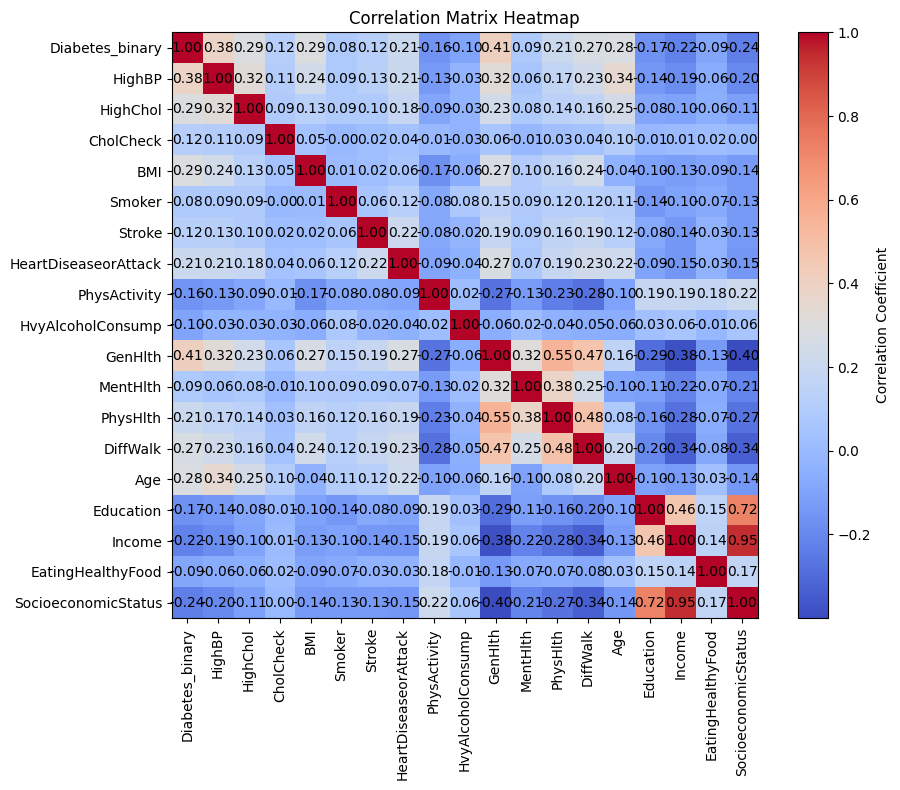

In [342]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')


plt.colorbar(label='Correlation Coefficient')


plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)


plt.title('Correlation Matrix Heatmap')

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        plt.text(j, i, f"{corr_matrix.values[i, j]:.2f}", 
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


## Feature Scaling

### Normalizing BMI (MinMaxScaler)

In [344]:
from sklearn.preprocessing import MinMaxScaler

f=["PhysHlth","MentHlth","Age","GenHlth"]

scaler = MinMaxScaler()
diabetes_train[f] = scaler.fit_transform(diabetes_train[f])
diabetes_test[f] = scaler.transform(diabetes_test[f])

### Models

In [125]:
train_data=diabetes_train
test_data=diabetes_test
train_label=train_data["Diabetes_binary"]
test_label=test_data["Diabetes_binary"]
train_data=train_data.drop("Diabetes_binary",axis=1)
test_data=test_data.drop("Diabetes_binary",axis=1)

### LogisticRegression Model

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42)

param_grid = [
    {
        "C": [0.1, 0.5, 1, 5, 10],  # Regularization strength
        "penalty": ["l1", "l2", "elasticnet"],  # Regularization type
        "solver": ["liblinear", "saga", "lbfgs"],  # Optimization algorithm
        "max_iter": [100, 200, 500],  # Maximum iterations
    }
]


grid_search=GridSearchCV(logistic_regression,param_grid,cv=5,return_train_score=True)
grid_search.fit(train_data,train_label)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

best accuracy 0.7470160116584867
LogisticRegression(C=0.5, penalty='l1', random_state=42, solver='saga')


C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [127]:
cvresult=grid_search.cv_results_

for mean_score,params in zip(cvresult["mean_test_score"],cvresult["params"]):
    print(np.sqrt(mean_score),params)

0.8641064970895384 {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.8641985785989467 {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
nan {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.864126959490038 {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.8641576548960125 {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.8636254820566428 {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
nan {'C': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan {'C': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
nan {'C': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.8641064970895384 {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
0.8642394976505899 {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
nan {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs'}
0.864126959490038 {'C': 0.1, 'max_iter': 200

In [28]:
#random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear', random_state=42)

# Define hyperparameters and their ranges for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-3, 3, 7),             # Regularization strength (log-spaced range from 10^-3 to 10^3)
    'penalty': ['l1', 'l2'],                # Penalty type ('l1' or 'l2')
    'max_iter': np.arange(50, 201, 50),     # Range for max_iter (from 50 to 200, step size of 50)
    'solver': ['liblinear', 'saga'],        # Solver to use
    'class_weight': [None, 'balanced'],     # Weight of classes
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,                               # Number of random combinations to try
    cv=5,                                     # 5-fold cross-validation
    verbose=2,                                # Verbosity of output
    random_state=42,
    n_jobs=-1                                  # Use all available CPUs
)

# Fit the RandomizedSearchCV model
random_search.fit(train_data, train_label)

# Print the best hyperparameters found
print(f"Best Hyperparameters: {random_search.best_params_}")

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(train_data)
accuracy = accuracy_score(train_label, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': np.int64(150), 'class_weight': None, 'C': np.float64(100.0)}
Test Accuracy: 0.7480


In [128]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42,solver='saga', penalty='l2', max_iter=150, class_weight=None, C = 100)
model=logistic_regression.fit(train_data,train_label)

prediction=logistic_regression.predict(test_data)

In [129]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(logistic_regression,train_data,train_label,cv=5)
cross_val

C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

array([0.74829812, 0.74644152, 0.74944744, 0.74650752, 0.74305924])

C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

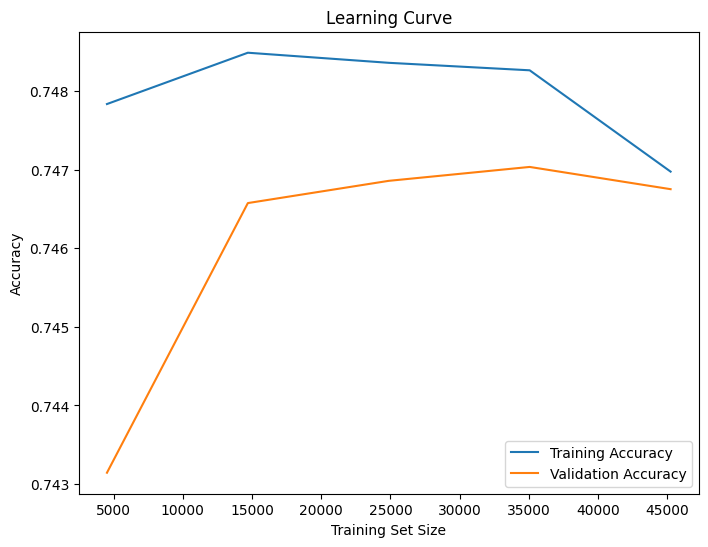

In [130]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    logistic_regression, train_data, train_label, cv=5, scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


### Plot Model Coefficients

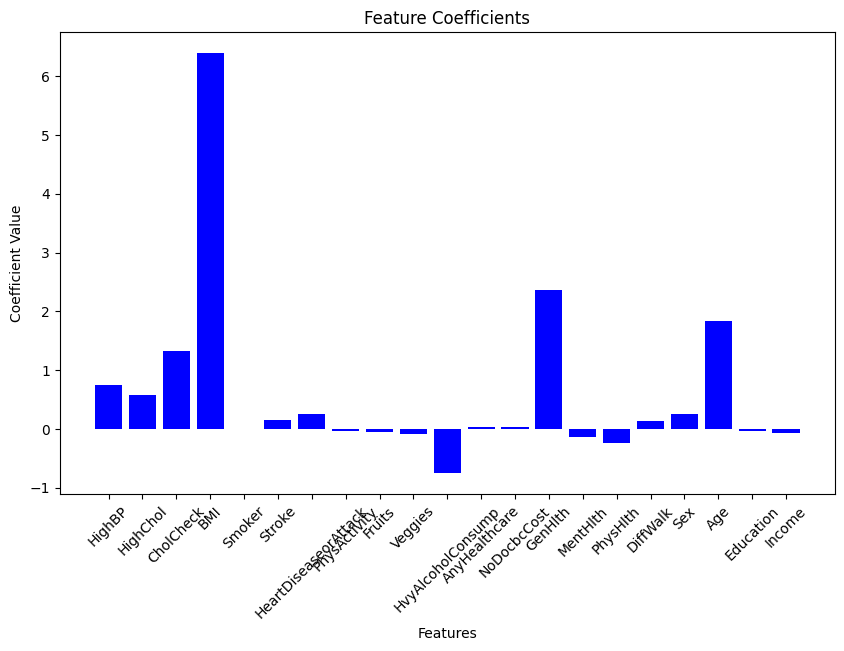

In [32]:
features = train_data.columns  
coefficients = logistic_regression.coef_.flatten()

plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='blue')
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


### Metrics Function

In [131]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

def calculate_metrics(y_true, y_pred):
    metrics={
        "Accuracy":accuracy_score(y_true,y_pred),
        "F1 Score":f1_score(y_true,y_pred),
        "Precision":precision_score(y_true,y_pred),
        "Recall":recall_score(y_true,y_pred),
        "ROC AUC":roc_auc_score(y_true,y_pred)
    }
    return metrics

### Logistic Regression Metrics

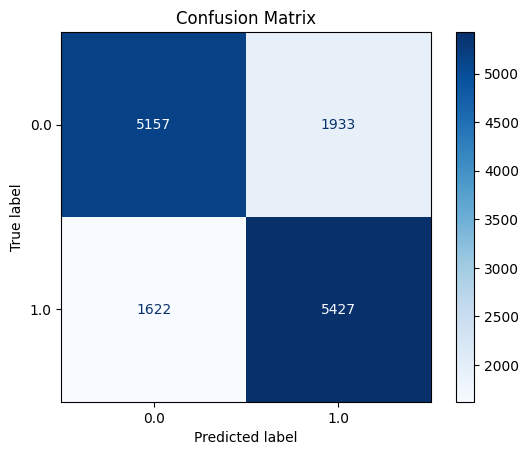

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logistic_regression, test_data, test_label, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

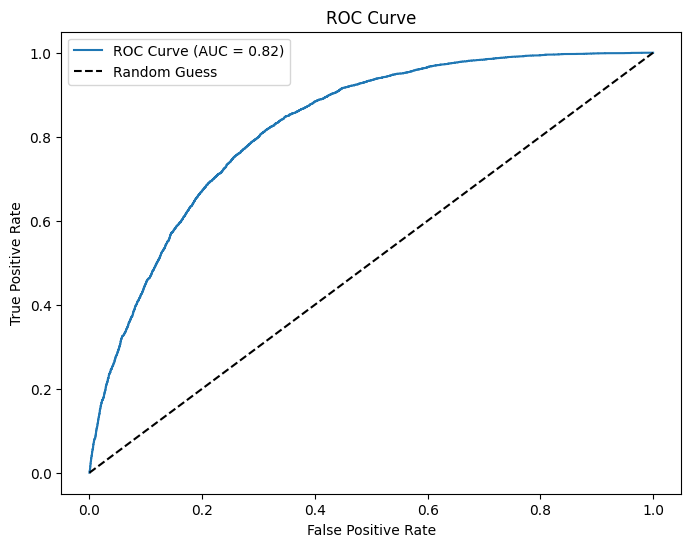

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = logistic_regression.predict_proba(test_data)[:, 1]

fpr, tpr, _ = roc_curve(test_label, y_proba)
auc_score = roc_auc_score(test_label, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


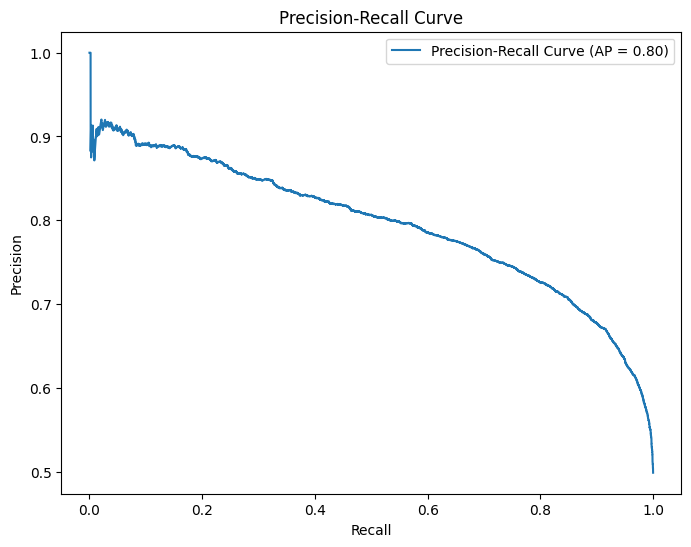

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(test_label, y_proba)
average_precision = average_precision_score(test_label, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [132]:
logistic_regression_metrics=calculate_metrics(test_label,prediction)

logistic_regression_metrics

{'Accuracy': 0.7486385175755004,
 'F1 Score': 0.7536392624428115,
 'Precision': 0.7368849125660838,
 'Recall': 0.7711732160590155,
 'ROC AUC': np.float64(0.7487036743200578)}

### Save the logistic_regression model

In [46]:
import os

os.makedirs("../models", exist_ok=True)
os.makedirs("../metrics", exist_ok=True)

In [47]:
import joblib
joblib.dump(logistic_regression,'../models/logistic_regression.pkl')


['../models/logistic_regression.pkl']

In [48]:
import json

with open("../metrics/logistic_regression.json","w") as f:
    json.dump(logistic_regression_metrics,f)

### Support Vector Machine

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Define the parameter grid
param_grid = [
    {
        "C": [0.1, 1, 10, 100],  # Regularization parameter
        "kernel": ["poly", "rbf", "sigmoid"],  # Kernel type (removed 'linear')
        "degree": [2, 3, 4],  # Degree of the polynomial kernel (only relevant for 'poly' kernel)
        "gamma": ["scale", "auto"],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        "max_iter": [200, 500,1000,2000],  # Maximum iterations
    }
]

# Perform grid search
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, return_train_score=True)
grid_search.fit(train_data, train_label)

# Print the best results
print("Best Accuracy:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)


C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver termin

KeyboardInterrupt: 

In [51]:
#random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from scipy.stats import uniform

# Create a LinearSVC classifier
svm_classifier = LinearSVC(random_state=42)

# Define the parameter distribution
param_distributions = {
    "C": uniform(0.1, 100),  # Regularization parameter
    "max_iter": [200, 500, 1000, 2000],  # Maximum iterations
    "penalty": ["l2"],  # Penalization norm (only 'l2' is supported by default)
    "loss": ["hinge", "squared_hinge"],  # Loss function
}

# Perform random search
random_search = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=20, cv=5, random_state=42, return_train_score=True)
random_search.fit(train_data, train_label)

# Print the best results
print("Best Accuracy:", random_search.best_score_)
print("Best Estimator:", random_search.best_estimator_)


C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\OneDrive\Desktop\diabetes-prediction\venv\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

Best Accuracy: 0.7476172729519031
Best Estimator: LinearSVC(C=np.float64(60.21150117432088), random_state=42)


In [52]:
from sklearn.svm import SVC,LinearSVC

# svc=SVC(kernel='rbf',random_state=42)
# model=svc.fit(train_data,train_label)
svc=LinearSVC(C=1,random_state=42)
model=svc.fit(train_data, train_label)

prediction=svc.predict(test_data)

In [53]:
cross_val=cross_val_score(svc,train_data,train_label,cv=10)
cross_val

array([0.75282885, 0.74310467, 0.74752475, 0.74358974, 0.74836428,
       0.75119363, 0.75402299, 0.74199823, 0.74571176, 0.74712644])

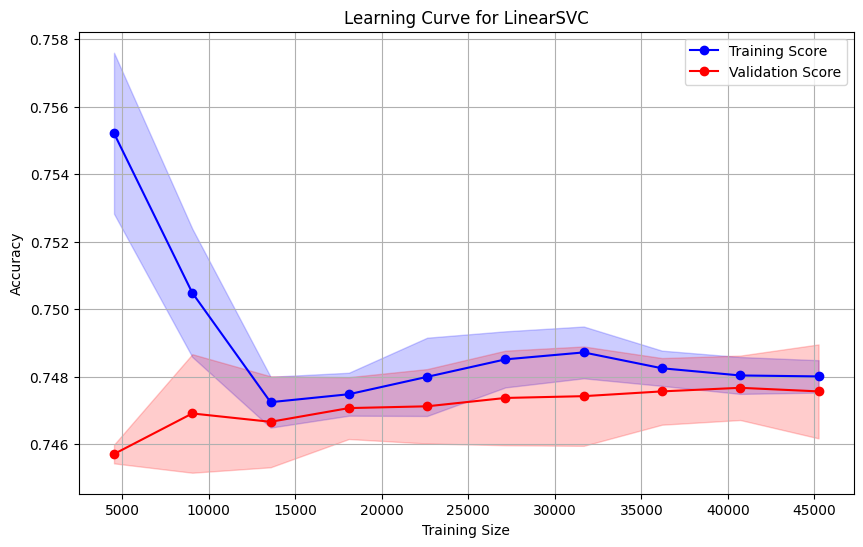

In [44]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=svc,
    X=train_data,  
    y=train_label, 
    cv=5,  
    scoring='accuracy',  
    train_sizes=np.linspace(0.1, 1.0, 10),  
    n_jobs=-1  
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, validation_mean, 'o-', color="red", label="Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.2, color="red")

plt.title("Learning Curve for LinearSVC")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

### SVM Metrics

In [54]:
svm_metrics=calculate_metrics(test_label,prediction)

svm_metrics

{'Accuracy': 0.7482141594172148,
 'F1 Score': 0.7543472260557549,
 'Precision': 0.7343812978637646,
 'Recall': 0.7754291388849482,
 'ROC AUC': np.float64(0.7482928487090468)}

In [ ]:
import joblib
joblib.dump(logistic_regression,'../models/svm.pkl')

In [ ]:
import json

with open("../metrics/svm.json","w") as f:
    json.dump(svm_metrics,f)

### Desision Tree Model

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(train_data, train_label)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.740119844527455
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=19,
                       random_state=42)


In [59]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(random_state=42,min_samples_leaf=19,criterion='entropy',max_depth=7)

decision_tree.fit(train_data,train_label)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=19,
                       random_state=42)

In [60]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(decision_tree,train_data,train_label,cv=5)
cross_val

array([0.743524  , 0.73928035, 0.73998762, 0.73678161, 0.74102564])

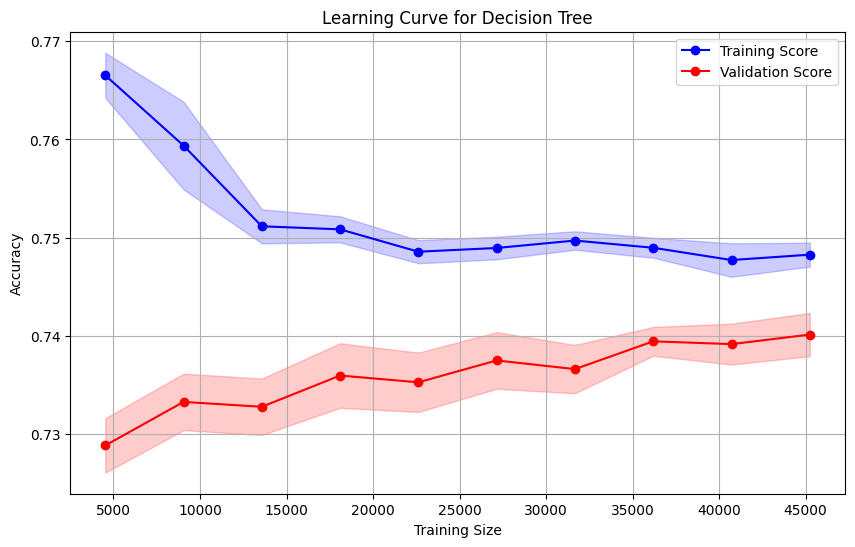

In [61]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=decision_tree,
    X=train_data,  
    y=train_label,  
    cv=5,
    scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    n_jobs=-1  
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, validation_mean, 'o-', color="red", label="Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.2, color="red")

plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


In [62]:
prediction=decision_tree.predict(test_data)

decision_tree_metrics=calculate_metrics(test_label,prediction)
decision_tree_metrics

{'Accuracy': 0.7366150364240752,
 'F1 Score': 0.7540615506538106,
 'Precision': 0.7054244408748301,
 'Recall': 0.8099021137750035,
 'ROC AUC': np.float64(0.736826938410774)}

In [249]:
import joblib
joblib.dump(decision_tree,'../models/decision_tree.pkl')

['../models/decision_tree.pkl']

In [250]:
import json

with (open("../metrics/decision_tree.json","w") as f):
    json.dump(decision_tree_metrics,f)

### Random Forest model

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(train_data, train_label)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.7503580460200047


In [179]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,bootstrap= True, max_depth=8,
max_features= 'sqrt', min_samples_leaf= 6, min_samples_split= 12, n_estimators= 100)


random_forest.fit(train_data, train_label)

RandomForestClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=12,
                       random_state=42)

In [180]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(random_forest,train_data,train_label,cv=5)
cross_val

array([0.74608788, 0.74573424, 0.74900539, 0.74544651, 0.74447392])

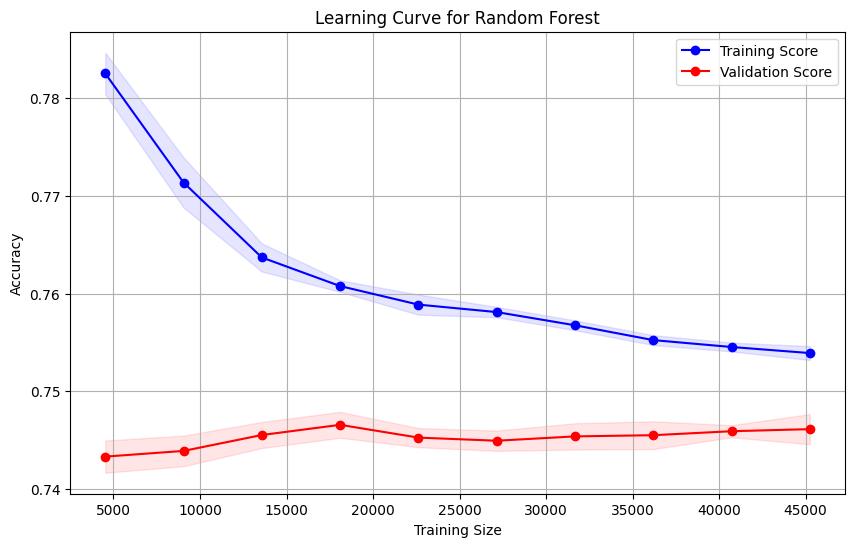

In [181]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    random_forest, train_data, train_label, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training Score")
plt.plot(train_sizes, val_mean, 'o-', color="r", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.1)

plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


In [182]:
prediction=random_forest.predict(test_data)

random_forest_metrics=calculate_metrics(test_label,prediction)
random_forest_metrics

{'Accuracy': 0.7460216422660726,
 'F1 Score': 0.7544279559597894,
 'Precision': 0.7282809611829945,
 'Recall': 0.7825223435948362,
 'ROC AUC': np.float64(0.7461271802600415)}

In [47]:
import joblib
joblib.dump(random_forest,'../models/random_forest.pkl')

['../models/random_forest.pkl']

In [48]:
import json

with open("../metrics/random_forest.json","w") as f:
    json.dump(random_forest_metrics,f)